In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("../Files/AirPassengers.csv")
df.TravelDate = pd.to_datetime(df.TravelDate)

Using TensorFlow backend.


In [2]:
df.Month = df.TravelDate

df = df.set_index('TravelDate')


In [3]:
df.head()

,Passengers
TravelDate,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
train, test = df[:-24], df[-24:]

In [5]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test  = scaler.transform(test)

In [6]:
n_input = test.shape[0]
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator, epochs=200)

Epoch 1/200
16/16 [==============================] - 3s 201ms/step - loss: 0.0975
Epoch 2/200
16/16 [==============================] - 1s 63ms/step - loss: 0.0171
Epoch 3/200
16/16 [==============================] - 1s 63ms/step - loss: 0.0158
Epoch 4/200
16/16 [==============================] - 1s 64ms/step - loss: 0.0116
Epoch 5/200
16/16 [==============================] - 1s 74ms/step - loss: 0.0153
Epoch 6/200
16/16 [==============================] - 1s 65ms/step - loss: 0.0122
Epoch 7/200
16/16 [==============================] - 1s 64ms/step - loss: 0.0143
Epoch 8/200
16/16 [==============================] - 1s 73ms/step - loss: 0.0139
Epoch 9/200
16/16 [==============================] - 1s 65ms/step - loss: 0.0148
Epoch 10/200
16/16 [==============================] - 1s 63ms/step - loss: 0.0127
Epoch 11/200
16/16 [==============================] - 1s 63ms/step - loss: 0.0131
Epoch 12/200
16/16 [==============================] - 1s 64ms/step - loss: 0.0143
Epoch 13/200
16/16 [====

Epoch 101/200
16/16 [==============================] - 2s 101ms/step - loss: 0.0038
Epoch 102/200
16/16 [==============================] - 1s 72ms/step - loss: 0.0035
Epoch 103/200
16/16 [==============================] - 1s 71ms/step - loss: 0.0034
Epoch 104/200
16/16 [==============================] - 1s 71ms/step - loss: 0.0033
Epoch 105/200
16/16 [==============================] - 1s 67ms/step - loss: 0.0061
Epoch 106/200
16/16 [==============================] - 1s 65ms/step - loss: 0.0041
Epoch 107/200
16/16 [==============================] - 1s 67ms/step - loss: 0.0031
Epoch 108/200
16/16 [==============================] - 1s 67ms/step - loss: 0.0049
Epoch 109/200
16/16 [==============================] - 1s 66ms/step - loss: 0.0024
Epoch 110/200
16/16 [==============================] - 1s 71ms/step - loss: 0.0043
Epoch 111/200
16/16 [==============================] - 1s 85ms/step - loss: 0.0037
Epoch 112/200
16/16 [==============================] - 1s 68ms/step - loss: 0.0037
Epo

16/16 [==============================] - 1s 62ms/step - loss: 0.0019
Epoch 200/200
16/16 [==============================] - 1s 67ms/step - loss: 0.0022


In [7]:
pred_list = []
batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)



In [8]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index=df[-n_input:].index, columns=['Predictions'])


In [9]:
df_predict.head()

,Predictions
TravelDate,
1959-01-01,358.688392
1959-02-01,373.909369
1959-03-01,411.966760
1959-04-01,425.846004
1959-05-01,460.109516


In [10]:
df_test = pd.concat([df, df_predict], axis=1)

In [11]:
df_test.tail(13)

,Passengers,Predictions
TravelDate,,
1959-12-01,405,373.251123
1960-01-01,417,369.596040
1960-02-01,391,369.680388
1960-03-01,419,393.546667
1960-04-01,461,399.237080
1960-05-01,472,442.302998
1960-06-01,535,506.733716
1960-07-01,622,565.521228
1960-08-01,606,568.838464


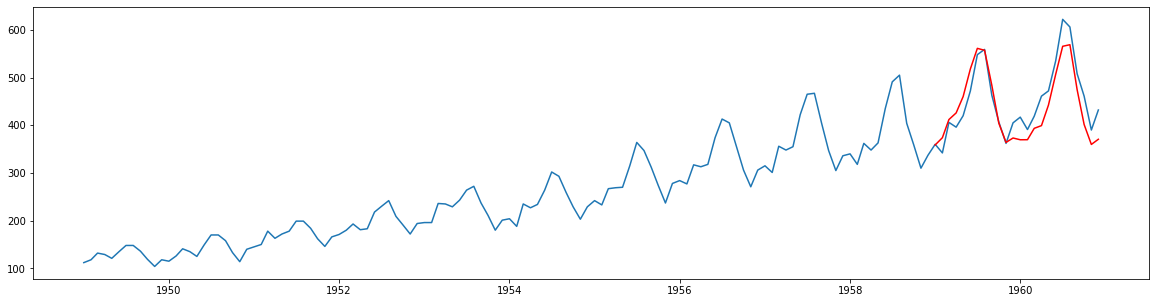

In [12]:
plt.figure(figsize=(20,5))
plt.plot(df_test.index, df_test['Passengers'])
plt.plot(df_test.index, df_test['Predictions'], color='r')

In [13]:
###Predictions for the next months

In [14]:
train = df
scaler.fit(train)
train = scaler.transform(train)

n_input = test.shape[0]
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)
model.fit_generator(generator, epochs=200)

pred_list = []
batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

Epoch 1/200
20/20 [==============================] - 2s 78ms/step - loss: 0.0028
Epoch 2/200
20/20 [==============================] - 1s 65ms/step - loss: 0.0020
Epoch 3/200
20/20 [==============================] - 1s 68ms/step - loss: 0.0023
Epoch 4/200
20/20 [==============================] - 2s 86ms/step - loss: 0.0029
Epoch 5/200
20/20 [==============================] - 2s 79ms/step - loss: 0.0023
Epoch 6/200
20/20 [==============================] - 1s 72ms/step - loss: 0.0019
Epoch 7/200
20/20 [==============================] - 1s 70ms/step - loss: 0.0017
Epoch 8/200
20/20 [==============================] - 1s 72ms/step - loss: 0.0015
Epoch 9/200
20/20 [==============================] - 1s 70ms/step - loss: 0.0022
Epoch 10/200
20/20 [==============================] - 1s 66ms/step - loss: 0.0023
Epoch 11/200
20/20 [==============================] - 1s 70ms/step - loss: 0.0019
Epoch 12/200
20/20 [==============================] - 1s 69ms/step - loss: 0.0021
Epoch 13/200
20/20 [=====

20/20 [==============================] - 1s 72ms/step - loss: 0.0013
Epoch 101/200
20/20 [==============================] - 1s 70ms/step - loss: 0.0017
Epoch 102/200
20/20 [==============================] - 1s 71ms/step - loss: 0.0014
Epoch 103/200
20/20 [==============================] - 1s 66ms/step - loss: 0.0018
Epoch 104/200
20/20 [==============================] - 1s 67ms/step - loss: 0.0013
Epoch 105/200
20/20 [==============================] - 1s 71ms/step - loss: 0.0015
Epoch 106/200
20/20 [==============================] - 1s 69ms/step - loss: 0.0017
Epoch 107/200
20/20 [==============================] - 1s 65ms/step - loss: 0.0015
Epoch 108/200
20/20 [==============================] - 1s 71ms/step - loss: 0.0016
Epoch 109/200
20/20 [==============================] - 1s 64ms/step - loss: 0.0016
Epoch 110/200
20/20 [==============================] - 1s 68ms/step - loss: 0.0015
Epoch 111/200
20/20 [==============================] - 1s 68ms/step - loss: 0.0018
Epoch 112/200
20/2

20/20 [==============================] - 2s 81ms/step - loss: 0.0015
Epoch 199/200
20/20 [==============================] - 1s 70ms/step - loss: 0.0017
Epoch 200/200
20/20 [==============================] - 2s 79ms/step - loss: 0.0013


In [15]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,25)]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [16]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                         index=future_dates[-n_input:].index,
                         columns=['Prediction'])
df_proj = pd.concat([df, df_predict],axis=1)

In [ ]:
future_dates.tail(12)

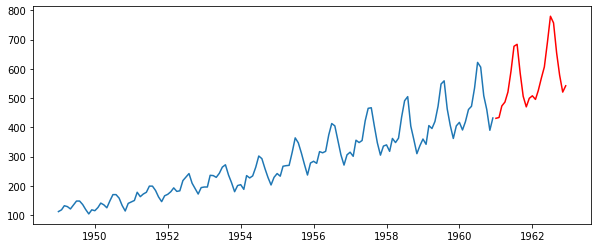

In [17]:
plt.figure(figsize=(10,4))
plt.plot(df_proj.index, df_proj['Passengers'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.show()